In [1]:
# read words as series of characters
# output prediction and hidden state
# feed prev hidden state to next step (RNN part)
# final predicition is the output (class)

2+2

4

In [2]:
import torch
print(torch.__version__)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)
print(torch.get_default_device())

2.7.1+cu126
cuda:0


In [3]:
import string
import unicodedata

allowed_chars = string.ascii_letters + ".,;'" + "_"
n_letters = len(allowed_chars)

def unicode_to_ascii(s: str) -> str:
    return ''.join(
        c for c in unicodedata.normalize('NFD', s)
        if unicodedata.category(c) != 'Mn' and c in allowed_chars
    )

print(f"Skowroński: {unicode_to_ascii('Skowroński')}")

Skowroński: Skowronski


In [4]:
def char_to_idx(c: str) -> int:
    if c in allowed_chars:
        return allowed_chars.index(c)
    else:
        return allowed_chars.index('_')

def str_to_tensor(s: str) -> torch.Tensor:
    t = torch.zeros(len(s), 1, n_letters, dtype=torch.float32)
    for i, c in enumerate(s):
        t[i][0][char_to_idx(c)] = 1
    return t

print(str_to_tensor("Skowroński").shape)
print(str_to_tensor("Skowroński"))

torch.Size([10, 1, 57])
tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       

In [5]:
from torch.utils.data import Dataset
import glob
import os

class NamesDataset(Dataset):
    def __init__(self, dir: str):
        self.dir = dir
        self.data = []
        self.data_tensors = []
        self.labels = []
        self.labels_tensors = []

        labels_set = set()

        text_files = glob.glob(f"{self.dir}/*.txt")
        for file in text_files:
            label = os.path.splitext(os.path.basename(file))[0]
            labels_set.add(label)
            with open(file, 'r', encoding='utf-8') as f:
                lines = f.read().strip().split('\n')
                for name in lines:
                    self.data.append(name)
                    self.data_tensors.append(str_to_tensor(name))
                    self.labels.append(label)

        self.labels_uniq = list(labels_set)
        for idx in range(len(self.labels)):
            temp_tensor = torch.tensor([self.labels_uniq.index(self.labels[idx])], dtype=torch.long)
            self.labels_tensors.append(temp_tensor)

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx: int):
        data_item = self.data[idx]
        data_label = self.labels[idx]
        data_tensor = self.data_tensors[idx]
        label_tensor = self.labels_tensors[idx]
        return label_tensor, data_tensor, data_label, data_item


In [6]:
dat = NamesDataset("data/names")
print(len(dat))
print(dat[0])

20074
(tensor([9], device='cuda:0'), tensor([[[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0.]],

        [[0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

In [7]:
X_train, X_test = torch.utils.data.random_split(dat, [.85, .15], generator=torch.Generator(device=device).manual_seed(42))

print(f"train: {len(X_train)}, test: {len(X_test)}")

train: 17063, test: 3011


In [8]:
import torch.nn as nn
import torch.nn.functional as F

class CharRNN(nn.Module):
    def __init__(self, input_size: int, hidden_size: int, output_size: int):
        super(CharRNN, self).__init__()

        self.lstm = nn.LSTM(input_size, hidden_size)
        self.ffn = nn.Linear(hidden_size, output_size)
        self.act = nn.LogSoftmax(dim=1)

    def forward(self, str_tensor: torch.Tensor):
        rnn_out, hidden = self.lstm(str_tensor)
        # out = self.ffn(hidden[0])
        out = self.ffn(hidden[0][0])
        out = self.act(out)

        return out


In [9]:
rnn = CharRNN(n_letters, 128, len(dat.labels_uniq))
print(rnn)

CharRNN(
  (lstm): LSTM(57, 128)
  (ffn): Linear(in_features=128, out_features=18, bias=True)
  (act): LogSoftmax(dim=1)
)


In [10]:
inp = str_to_tensor("Albert")
out = rnn(inp)
print(out)
_, i = out.topk(1)
print(dat.labels_uniq[i.item()])

tensor([[-2.9027, -2.8585, -2.9443, -2.8318, -2.8714, -2.8832, -2.9165, -2.9446,
         -2.9355, -2.8745, -2.9067, -2.8740, -2.9238, -2.8631, -2.8127, -2.8470,
         -2.9337, -2.9161]], device='cuda:0', grad_fn=<LogSoftmaxBackward0>)
Japanese


In [11]:
import random
import numpy as np
from tqdm import trange

nepochs = 30
bs = 64
loss_fn = nn.NLLLoss()
curr_loss = 0.0
all_losses = []
rnn.train()
opt = torch.optim.Adam(rnn.parameters(), lr=0.001)

for epoch in (pbar := trange(1, nepochs+1)):
    rnn.zero_grad()

    batches = list(range(len(X_train)))
    random.shuffle(batches)
    batches = np.array_split(batches, len(batches) // bs)

    for idx, batch in enumerate(batches):
        batch_loss = 0.0
        for i in batch:
            label_tensor, text_tensor, label, text = X_train[i]
            out = rnn(text_tensor)
            loss = loss_fn(out, label_tensor)
            batch_loss += loss
        batch_loss.backward()
        nn.utils.clip_grad_norm_(rnn.parameters(), 3)
        opt.step()
        opt.zero_grad()

        curr_loss += batch_loss.item() / len(batch)

    all_losses.append(curr_loss / len(batches))
    pbar.set_description(f"Epoch {epoch}, loss: {all_losses[-1]:.4f}")
    curr_loss = 0.0

Epoch 30, loss: 0.2709: 100%|██████████| 30/30 [12:03<00:00, 24.10s/it]


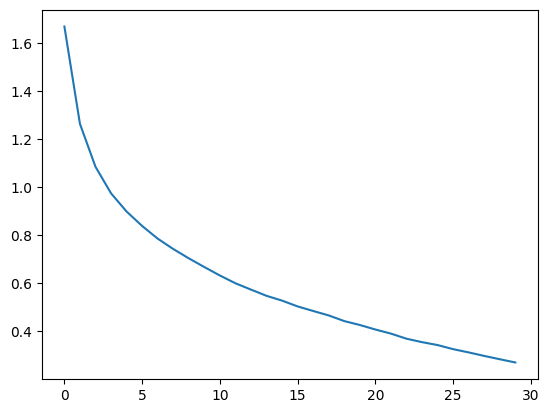

In [12]:
import matplotlib.pyplot as plt

plt.plot(all_losses)
plt.savefig("loss_LSTM.png")

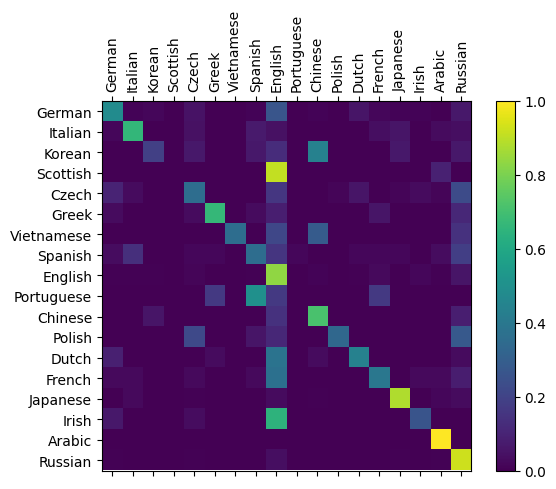

In [13]:
import matplotlib.ticker as ticker


confusion = torch.zeros(len(dat.labels_uniq), len(dat.labels_uniq), dtype=torch.float32)

rnn.eval()
with torch.no_grad():
    for i in range(len(X_test)):
        label_tensor, text_tensor, label, text = X_test[i]
        out = rnn(text_tensor)
        _, pred = out.topk(1)
        confusion[label_tensor.item()][pred.item()] += 1

for i in range(len(dat.labels_uniq)):
    denom = confusion[i].sum()
    if denom > 0:
        confusion[i] = confusion[i] / denom

fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(confusion.cpu().numpy())
fig.colorbar(cax)

ax.set_xticks(np.arange(len(dat.labels_uniq)), labels=dat.labels_uniq, rotation=90)
ax.set_yticks(np.arange(len(dat.labels_uniq)), labels=dat.labels_uniq)

ax.xaxis.set_major_locator(ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(ticker.MultipleLocator(1))

plt.savefig("confusion_LSTM.png", dpi=300, bbox_inches='tight')
plt.show()